In [300]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Cuaderno Jupyter con diferentes rutinas de hacer un ajuste lineal 

### Creamos los vectores xdata e ydata de modo que ydata dependa linealmente de xdata, pero con un cierto ruido añadido

In [301]:
# Creamos un vector x
xdata = np.arange(1,20)

# Valores reales de pendiente e intercepto
slope_real = 1.5
intercept_real = 4.0

# Creamos un vector y con estos valores e incluyendo un cierto ruido

ynoise = 1*np.random.randn(len(x))
ydata = 1.5*xdata + 4 + ynoise

# Definimos errores para cada punto, proporcionales al ruido que hemos introducido
ydataerr = 1.5*ynoise

<ErrorbarContainer object of 3 artists>

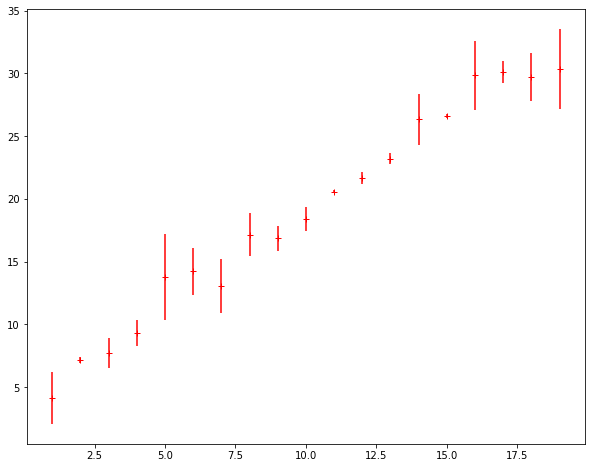

In [302]:
# Visualizamos los puntos
plt.figure(figsize=(10,8))
plt.errorbar(xdata,ydata,yerr=ydataerr,marker='+',color='red',label='data',ls='')

### Modo 1: con scikit-learn LinearRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

Ajusta un modelo lineal a un conjunto de datos (sin errores) haciendo un ajuste de mínimos cuadrados

In [303]:
# Esto es necesario porque la función de ajuste espera vectores columna
xdataC = xdata.reshape(-1,1)
ydataC = ydata.reshape(-1,1)

# Creamos el objeto que realiza la regresión lineal
linear_regressor = LinearRegression()

# Hacemos el ajuste con los datos xdata e ydata
linear_regressor.fit(xdataC,ydataC)

# Generamos la predicción que el modelo ajustado nos da para x: y_model. Este modelo se evalua en los valores de x
y_model1 = linear_regressor.predict(xdataC)

# Obtenemos la pendiente
slope1 = linear_regressor.coef_[0][0]
intercept1 = linear_regressor.intercept_[0]

In [316]:
# Representamos el resultado y escribimos la pendiente como título del gráfico

print('Método 1: scikit-learn.LinearRegression()')
print(f'Pendiente = {slope1:5.2f}, Término independiente = {intercept1:5.2f}')


Método 1: scikit-learn.LinearRegression()
Pendiente =  1.50, Término independiente =  4.00


### Modo 2: con numpy.polyfit()

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

Hace un ajuste de los datos a un polinomio de grado 1. Puede utilizar pesos para cada punto, que este caso igualamos a la inversa de la barra de error.
Proporciona la matriz de covarianza cuyos elementos diagonales permiten estimar el error de los coeficientes del ajuste.

In [305]:
# Otra forma de hacerlo con el paquete numpy.polyfit

coeffs, V = np.polyfit(xdata, ydata, 1, w=1/ydataerr, cov='unscaled')

# Pendiente y su error
slope2 = coeffs[0]
err_slope2 = np.sqrt(V[0][0])

# Termino independiente y su error
intercept2 = coeffs[1]
err_intercept2 = np.sqrt(V[1][1])

y_model2 = slope2*xdata+intercept2

In [306]:
# Representamos el resultado y escribimos la pendiente como título del gráfico

print('Método 2: scipy.polifit')
print(f'Pendiente = {slope2:5.2f} ± {err_slope2:5.2f}, Término independiente = {intercept2:5.2f} ± {err_intercept2:5.2f}')


Método 2: scipy.polifit
Pendiente =  1.50 ±  0.02, Término independiente =  4.05 ±  0.26


### Modo 3: con curve_fit de scipy.optimize 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

Utiliza un ajuste no lineal a una función f cualquiera. En nuestro caso será una función lineal.
Proporciona la matriz de covarianza cuyos elementos diagonales permiten estimar el error de los coeficientes del ajuste.

In [307]:
# Definimos una función lineal que se necesita como entrada
def linearmodel(x,intercept,slope):
    y = intercept + slope * x
    return y

a_fit, cov = curve_fit(linearmodel, xdata, ydata, sigma=ydataerr, absolute_sigma=False)

# Pendiente y su error
slope3 = a_fit[1]
err_slope3 = np.sqrt(cov[1][1])

# Termino independiente y su error
intercept3 = a_fit[0]
err_intercept3 = np.sqrt(cov[0][0])

y_model3 = slope3*xdata+intercept3

In [308]:
# Representamos el resultado y escribimos la pendiente como título del gráfico

print('Método 3: scipy.curve_fit')
print(f'Pendiente = {slope3:5.2f} ± {err_slope3:5.2f}, Término independiente = {intercept3:5.2f} ± {err_intercept3:5.2f}')


Método 3: scipy.curve_fit
Pendiente =  1.50 ±  0.02, Término independiente =  4.05 ±  0.18


### Comparación de los métodos y representación gráfica

In [314]:
print(f'Método 1:  Pendiente = {slope1:4.2f};        Término independiente = {intercept1:4.2f}')
print(f'Método 2:  Pendiente = {slope2:4.2f} ± {err_slope2:4.2f}; Término independiente = {intercept2:4.2f} ± {err_intercept2:4.2f}')
print(f'Método 3:  Pendiente = {slope3:4.2f} ± {err_slope3:4.2f}; Término independiente = {intercept3:4.2f} ± {err_intercept3:4.2f}')


Método 1:  Pendiente = 1.50;        Término independiente = 4.00
Método 2:  Pendiente = 1.50 ± 0.02; Término independiente = 4.05 ± 0.26
Método 3:  Pendiente = 1.50 ± 0.02; Término independiente = 4.05 ± 0.18


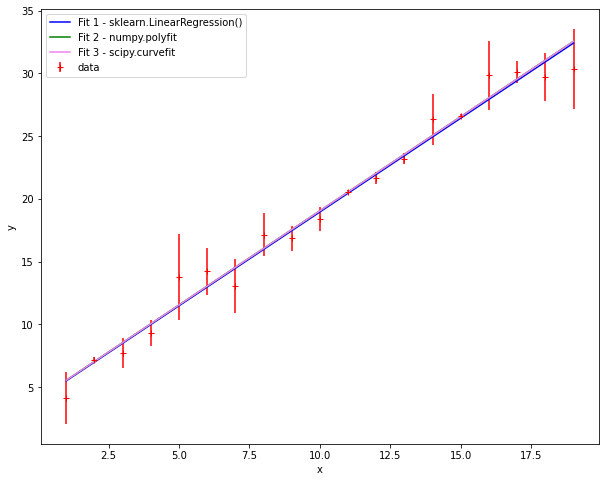

In [315]:
#Representamos el resultado y escribimos la pendiente como título del gráfico

plt.figure(figsize=(10,8))
plt.errorbar(xdata,ydata,yerr=ydataerr,marker='+',color='red',label='data',ls='')
plt.plot(xdata,y_model1,ls='-',color='blue',label='Fit 1 - sklearn.LinearRegression()')
plt.plot(xdata,y_model2,ls='-',color='green',label='Fit 2 - numpy.polyfit')
plt.plot(xdata,y_model3,ls='-',color='violet',label='Fit 3 - scipy.curvefit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()